In [7]:
#kütüphaneleri yükledik ve alias verdik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#veri setini çekelim...
#netflix=pd.read_csv("netflix_titles") bunun çalışması için csv dosyası bu dosya ile aynı klasörde olmalu

In [9]:
#veri setini çekelim...tam yolu ver \ yerine / olmalı
netflix=pd.read_csv("C:/Users/MEHMET CAN/OneDrive/Masaüstü/netflix_titles.csv")

In [10]:
netflix.head()#verileri görüntüleyelim

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
netflix.shape#özelliklerine bakalım dataframein --- 8807 satır 12 sütun

(8807, 12)

In [17]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# veri setindeki eksik değerlere bakalım...
#hangi başlıktan ne kadar veri eksik onu gösterir
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [23]:
#verilerimi data isminde bir klasöre atalım ki kendi dataframemiz bozulmasın bu klasör içinde işlem yapalım
data=netflix.copy()

In [25]:
data.shape

(8807, 12)

In [27]:
#eksik verileri temizleyelim ve tekrar dataya eşitleyelim
data=data.dropna()

In [29]:
data.shape#8000 lerden 5300 lere düştü veri

(5332, 12)

Text(0.5, 1.0, 'tür')

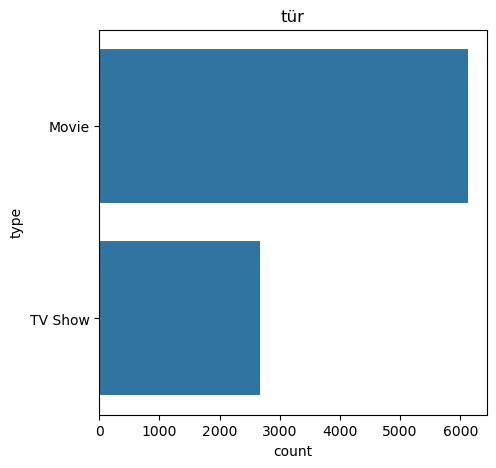

In [31]:
sns.countplot(netflix["type"])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("tür")

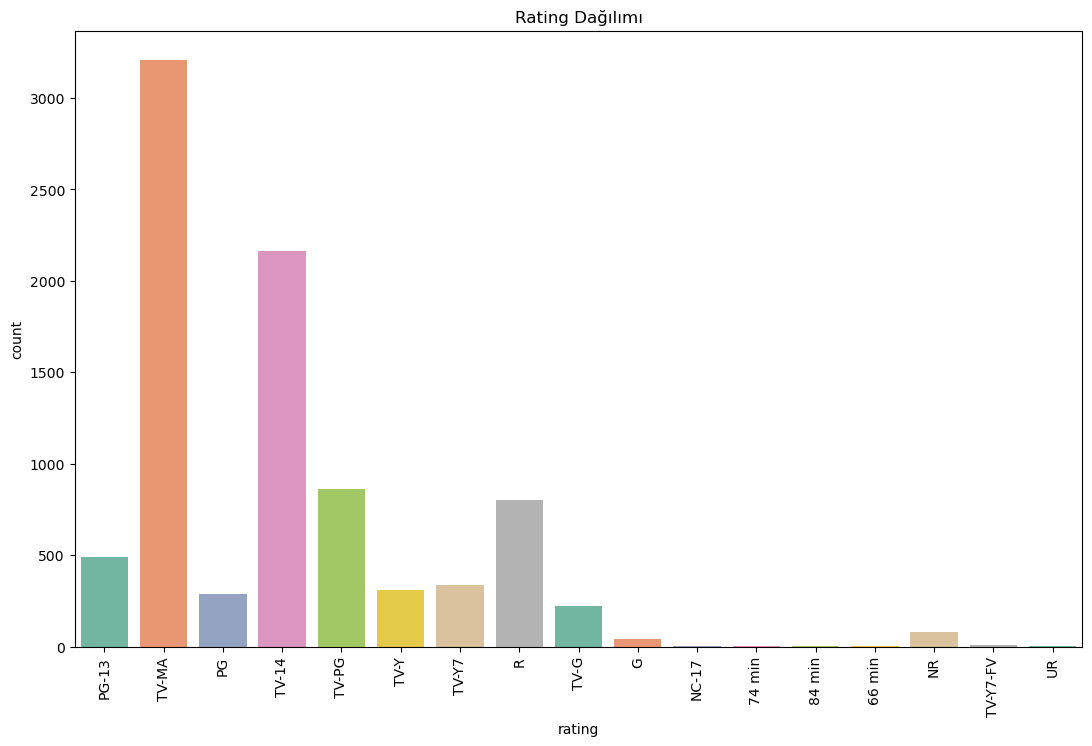

In [33]:
plt.figure(figsize=(13, 8))

# Countplot, hue ekleyip legend kapatıyoruz
sns.countplot(x="rating", data=netflix, hue="rating", dodge=False, palette="Set2", legend=False)

plt.xticks(rotation=90, ha="center")
plt.title("Rating Dağılımı")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

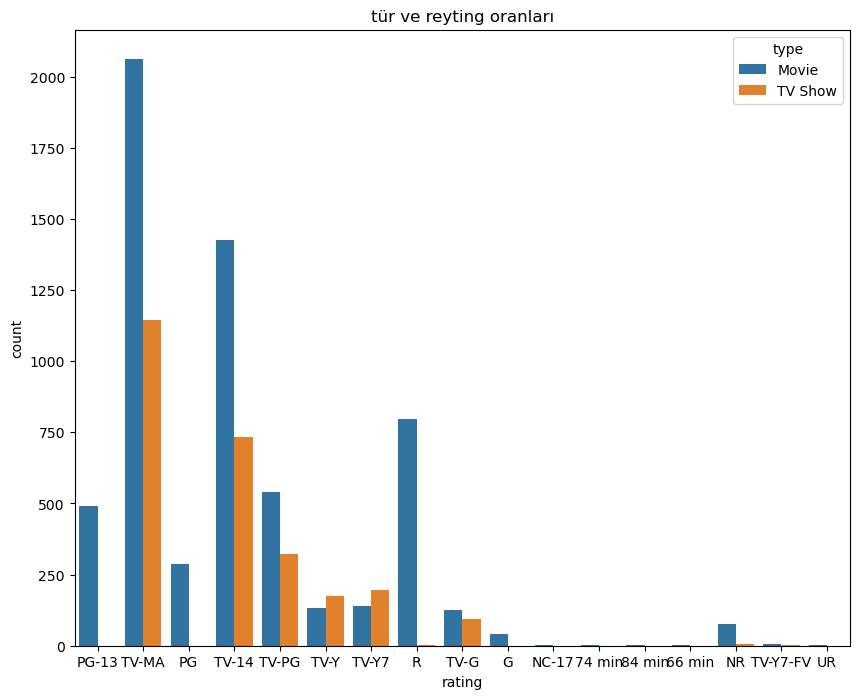

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=netflix)
plt.title("tür ve reyting oranları")
plt.show

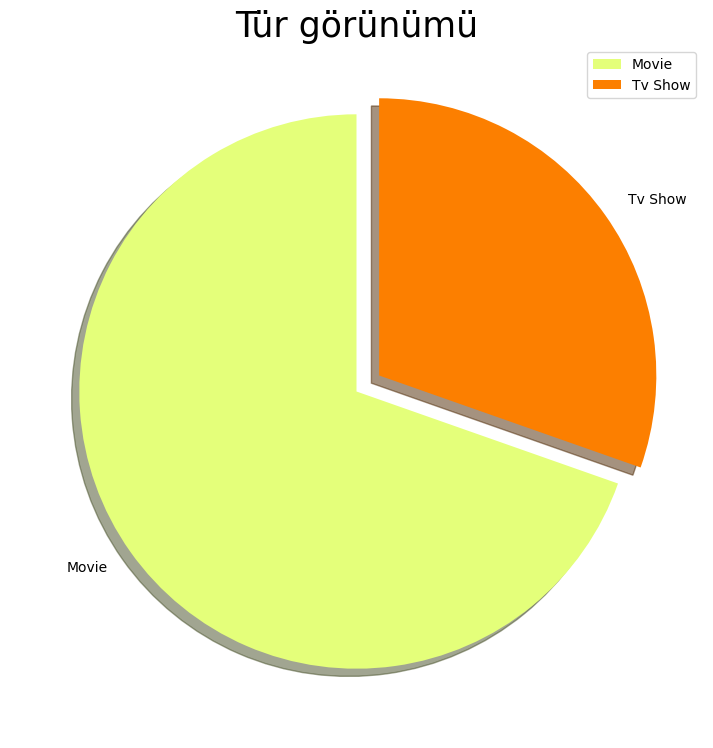

In [37]:
labels=["Movie","Tv Show"]
size=netflix["type"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Tür görünümü",fontsize=25)
plt.legend()
plt.show()

<Axes: ylabel='count'>

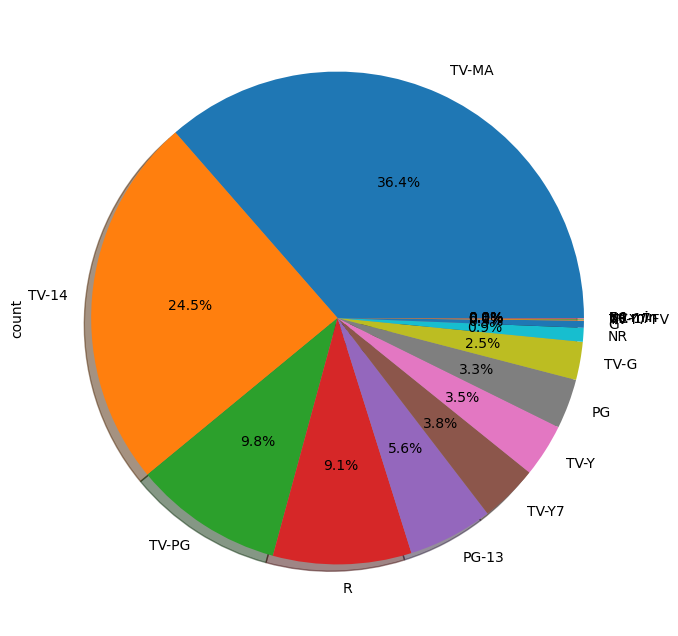

In [39]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,figsize=(10,8))